# Moneyball

This project applies data wrangling and exploratory data analysis to baseball data. In particular, we want to know how well did [Moneyball](https://en.wikipedia.org/wiki/Moneyball_(film)) work for the [Oakland A's](https://en.wikipedia.org/wiki/Oakland_Athletics). 

We'll be looking at data about teams in [Major League Baseball](https://en.wikipedia.org/wiki/Major_League_Baseball). A couple of important points:

Major League Baseball is a professional baseball league, where teams pay players to play baseball. The goal of each team is to win as many games out of a 162 game season as possible. Teams win games by scoring more runs ("getting more points") than their adversary. In principle, better players are costlier, so teams that want good players need to spend more money. Teams that spend the most, frequently win the most. So, the question is, how can a team that can't spend so much win? The basic idea that Oakland (and other teams) used is to redefine what makes a player good, i.e., figure out what player characteristics translated into wins. Once they realized that teams were not really pricing players using these characteristics, they could exploit this to pay for undervalued players, players that were good according to their metrics, but were not recognized as such by other teams, and therefore not as expensive.

## The Data

We will be using data from a very useful database on baseball teams, players and seasons curated by Sean Lahman available at [http://www.seanlahman.com/baseball-archive/statistics/](http://www.seanlahman.com/baseball-archive/statistics/). The database has been made available as a `sqlite` database [https://github.com/jknecht/baseball-archive-sqlite](https://github.com/jknecht/baseball-archive-sqlite). `sqlite` is a light-weight, file-based database management system that is well suited for small projects and prototypes.

You can read more about the dataset here: [http://seanlahman.com/files/database/readme2014.txt](http://seanlahman.com/files/database/readme2014.txt).  (Mirror: [readme2014.txt](mirror/readme2014.txt))


## Objective

We want to understand how efficient teams have been historically at spending money and getting wins in return. In the case of Moneyball, one would expect that Oakland was not much more efficient than other teams in their spending before 2000, were much more efficient (they made a movie about it after all) between 2000 and 2005, and by then other teams may have caught up. The objective of this project is to see how this is reflected in the data we have.

# Part 1: Data Wrangling

The data you needed to answer these questions is in the Salaries and Teams tables of the database. Using SQL we'll compute a relation containing the total payroll and winning percentage (number of wins / number of games * 100) for each team (that is, for each teamID and yearID combination).


To do that we're going to use two queries on the Salaries and Teams tables, and do an inner join on teamID and yearID to create a dataframe containing both, and since we are using inner join it will contain matching records only and there will be no missing data.
Since there is no real coverage of player's salaries until 1985 our teams query will only include data >= 1985.[*](https://rdrr.io/github/cdalzell/Lahman/man/Salaries.html)


In [1]:
import sqlite3
import pandas as pd

In [2]:
sq_file = 'lahman2014.sqlite'
con = sqlite3.connect(sq_file)

In [3]:
# team salary query
sal_q = "SELECT teamID,yearID, sum(salary) as total_payroll,sum(salary)/count(salary) as payroll_mean FROM Salaries GROUP BY teamID,yearID"
# convert to pandas dataframe
team_sal = pd.read_sql(sal_q,con)

In [42]:
team_sal.head(5)

,teamID,yearID,total_payroll,payroll_mean
0,ATL,1985,14807000.0,673045.454545
1,BAL,1985,11560712.0,525486.909091
2,BOS,1985,10897560.0,435902.400000
3,CAL,1985,14427894.0,515281.928571
4,CHA,1985,9846178.0,468865.619048


In [5]:
# team query
team_q = "SELECT yearID,teamID,lgID,name,franchID,G as Games,W as Wins,L as Losses,Rank, (W*100.0/G) as winning_percentage FROM Teams WHERE  yearID >= '1985' GROUP BY yearID,teamID"
# convert to pandas dataframe
team_df = pd.read_sql(team_q,con)

In [43]:
team_df.head(5)

,yearID,teamID,lgID,name,franchID,Games,Wins,Losses,Rank,winning_percentage
0,1985,ATL,NL,Atlanta Braves,ATL,162,66,96,5,40.740741
1,1985,BAL,AL,Baltimore Orioles,BAL,161,83,78,4,51.552795
2,1985,BOS,AL,Boston Red Sox,BOS,163,81,81,5,49.693252
3,1985,CAL,AL,California Angels,ANA,162,90,72,2,55.555556
4,1985,CHA,AL,Chicago White Sox,CHW,163,85,77,3,52.147239


In [7]:
# an do inner merge of the two dataframes 
df = pd.merge(team_df,team_sal,on = ('teamID','yearID'),how = 'inner')


In [45]:
df.tail(5)

,yearID,teamID,lgID,name,franchID,Games,Wins,Losses,Rank,winning_percentage,total_payroll,payroll_mean
853,2014,SLN,NL,St. Louis Cardinals,STL,162,90,72,1,55.555556,120693000.0,4.310464e+06
854,2014,TBA,AL,Tampa Bay Rays,TBD,162,77,85,4,47.530864,72689100.0,2.907564e+06
855,2014,TEX,AL,Texas Rangers,TEX,162,67,95,5,41.358025,112255059.0,4.677294e+06
856,2014,TOR,AL,Toronto Blue Jays,TOR,162,83,79,3,51.234568,109920100.0,4.396804e+06
857,2014,WAS,NL,Washington Nationals,WSN,162,96,66,1,59.259259,131983680.0,4.399456e+06


# Part 2: Exploratory Data Analysis

We will now plot the distribution of payrolls for all teams from 1990-2014

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# set up a temporary df between 1990 and 2014 for plotting
temp = df[df['yearID'] >= 1990]
temp = temp[temp['yearID'] <= 2014]


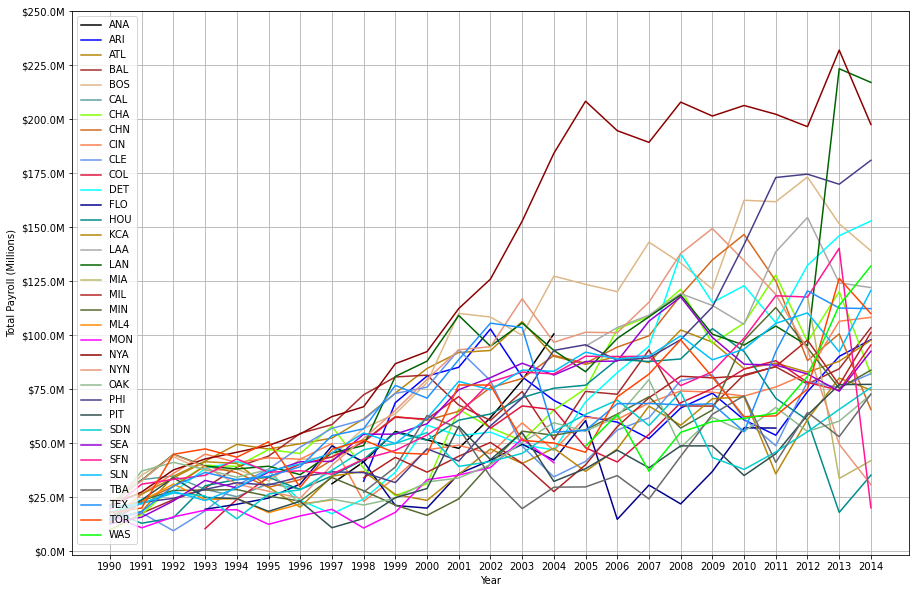

In [97]:
# group by teamID 
group = temp.groupby('teamID')

fig, ax = plt.subplots()
# set of distinct colors for all teams 
cnames =['black','blue','darkgoldenrod','brown','burlywood','cadetblue','chartreuse','chocolate','coral','cornflowerblue','crimson','cyan','darkblue','darkcyan','darkgoldenrod','darkgray','darkgreen','darkkhaki','firebrick','darkolivegreen','darkorange','fuchsia','darkred','darksalmon','darkseagreen','darkslateblue','darkslategray','darkturquoise','darkviolet','deeppink','deepskyblue','dimgray','dodgerblue','orangered','lime']
# color cycler to use different color for each plot 
ax.set_prop_cycle(color = cnames)
# iterate through each group and plot
for i,g in group:
    # i is teamID we'll be using for the legend
    ax.plot(g['yearID'],g['total_payroll'],label = i)
    ax.legend()
    

ax.set_xlabel('Year')
ax.set_ylabel('Total Payroll (Millions)')
# custom formatter to display total payroll
def millions(x,pos):
    return '${:1.1f}M'.format(x*1e-06)
ax.yaxis.set_major_formatter(millions)
# use custom y ticks
ax.set_yticks(np.array([0e+00,25e+06,50e+06,75e+06,100e+06,125e+06,150e+06,175e+06,200e+06,225e+06,250e+06]))
ax.grid()
# display each year for xticks
ax.set_xticks(np.arange(min(temp['yearID']),max(temp['yearID'] )+ 1 ,1.0))
fig.set_figwidth(15)
fig.set_figheight(10)


It looks like payroll is increasing over time generally, and the spread of payrolls is also increasing. There is less spread before 2000 and even less before 1995, payroll for all teams was less than $50 million and there is so much overlap its even hard to distinguish each team.

We will now plot mean payroll vs time to see the trend for payroll overtime.

In [49]:
# mean query to calculate mean salary per year
mean_q = "SELECT yearID, sum(salary)/count(salary) as mean_salary FROM Salaries GROUP BY yearID"
mean_df = pd.read_sql(mean_q,con)
mean_df.rename(columns={'mean_salary':'mean_salary(/yr)'},inplace=True)
mean_df.head(5)

,yearID,mean_salary(/yr)
0,1985,476299.447273
1,1986,417147.043360
2,1987,434729.465710
3,1988,453171.076923
4,1989,506323.081575


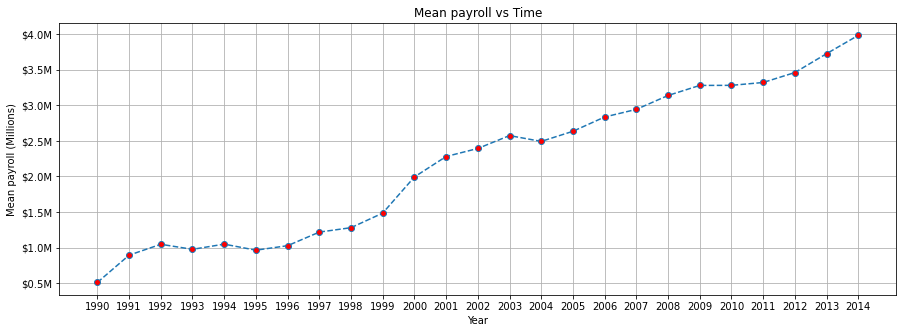

In [52]:
mean_plt = mean_df[mean_df["yearID"] >= 1990]
fig2, ax2 = plt.subplots()
ax2.plot(mean_plt['yearID'],mean_plt['mean_salary(/yr)'],ls = '--',marker='o',markerfacecolor="r")
ax2.set_xlabel('Year')
ax2.set_ylabel('Mean payroll (Millions)')
ax2.set_title('Mean payroll vs Time')
ax2.yaxis.set_major_formatter(millions)
ax2.set_xticks(np.arange(1990,2015 ,1.0))# change the default xticks
ax2.grid()
fig2.set_figwidth(15)
fig2.set_figheight(5)


We will now discretize the data into five periods and produce a scatter plot of mean winning percentage vs mean payroll. 

In [53]:
# add mean_salary(/yr) to the main dataframe
dff = pd.merge(df,mean_df,on = ('yearID'),how = 'inner')


In [56]:
bin = [1989,1994,1999,2004,2009,2015] # create bins
label = ['1990-1994','1995-1999','2000-2004','2005-2009','2010-2015']

dff['periods'] = pd.cut(dff['yearID'],bin,labels=label)
gr = dff.groupby('periods') # create groups based on period

g1 = gr.get_group('1990-1994')
g2 = gr.get_group('1995-1999')
g3 = gr.get_group('2000-2004')
g4 = gr.get_group('2005-2009')
g5 = gr.get_group('2010-2015')

In order to produce a scatter plot for each period we need to calculate mean winning percentage and mean payroll over the period. We'll be following the same steps for each period, and to avoid repetition there will be less discription. 

In [103]:
tmp = g1.copy() # create a temp df to calculate the 5 year avg of winning % and mean salary
for i,g in g1.groupby('teamID'):# iterate through each team and calculate 5 yr avg
    for j,row in g1.iterrows():
        if row['teamID']== i:
            tmp.loc[j,'win_per_mean']=(g['winning_percentage'].sum()/5)# add the 5 yr avg to df
            tmp.loc[j,'sal_mean']=(g['payroll_mean'].sum()/5) 

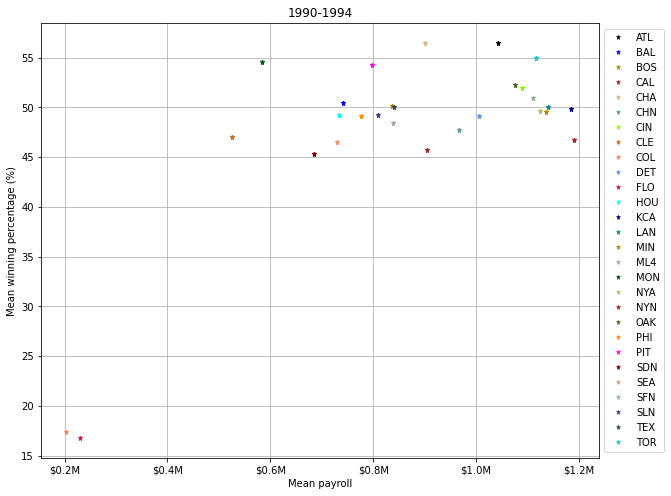

In [104]:
# plot 1990-1994 period
fig3, ax3 = plt.subplots()
ax3.set_prop_cycle(color = cnames)

for i,g in tmp.groupby('teamID'):
    ax3.plot(g['sal_mean'],g['win_per_mean'],linestyle = 'none',marker = '*',markersize =5,markeredgewidth=.5,label = i)   
    
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax3.set_xlabel('Mean payroll')
ax3.set_ylabel('Mean winning percentage (%)')
ax3.set_title('1990-1994')
ax3.grid()
ax3.xaxis.set_major_formatter(millions)
fig3.set_figwidth(10)
fig3.set_figheight(8)

In [101]:
tmp = g2.copy() # repeat the step as above to the 1995-1999 period
for i,g in g2.groupby('teamID'):
    for j,row in g2.iterrows():
        if row['teamID']== i:
            tmp.loc[j,'win_per_mean']=(g['winning_percentage'].sum()/5)
            tmp.loc[j,'sal_mean']=(g['payroll_mean'].sum()/5)

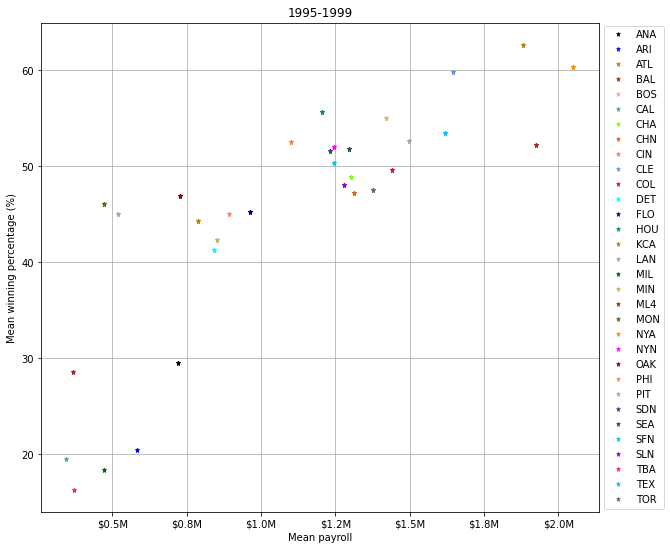

In [102]:
# plot 1995-1999 period
fig4, ax4 = plt.subplots()
ax4.set_prop_cycle(color = cnames)

for i,g in tmp.groupby('teamID'):
    ax4.plot(g['sal_mean'],g['win_per_mean'],linestyle = 'none',marker = '*',markersize =5,markeredgewidth=.5,label = i)
      
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax4.set_xlabel('Mean payroll')
ax4.set_ylabel('Mean winning percentage (%)')
ax4.set_title('1995-1999')
ax4.grid()
ax4.xaxis.set_major_formatter(millions)
fig4.set_figwidth(10)
fig4.set_figheight(9)

In [105]:
tmp = g3.copy()
for i,g in g3.groupby('teamID'):
    for j,row in g3.iterrows():
        if row['teamID']== i:
            tmp.loc[j,'win_per_mean']=(g['winning_percentage'].sum()/5)
            tmp.loc[j,'sal_mean']=(g['payroll_mean'].sum()/5)

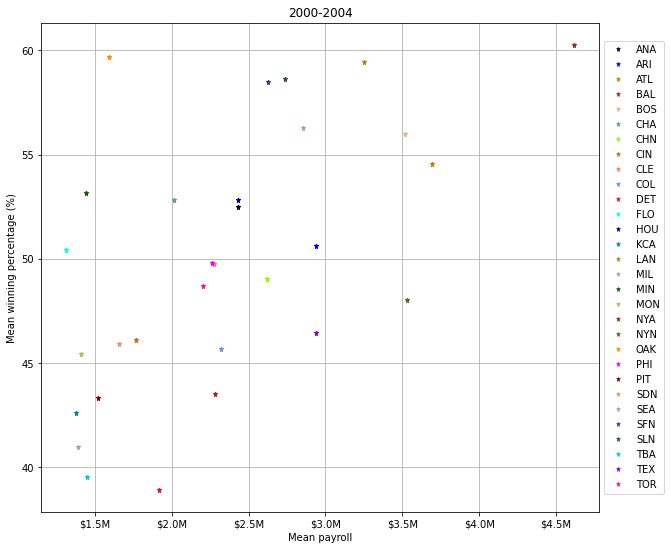

In [106]:
# plot 2000-2004 period
fig5, ax5 = plt.subplots()
ax5.set_prop_cycle(color = cnames)

for i,g in tmp.groupby('teamID'):
    ax5.plot(g['sal_mean'],g['win_per_mean'],linestyle = 'none',marker = '*',markersize =5,markeredgewidth=.5,label = i)
    
ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax5.set_xlabel('Mean payroll')
ax5.set_ylabel('Mean winning percentage (%)')
ax5.set_title('2000-2004')
ax5.grid()
ax5.xaxis.set_major_formatter(millions)
fig5.set_figwidth(10)
fig5.set_figheight(9)

In [107]:
tmp = g4.copy()
for i,g in g4.groupby('teamID'):
    for j,row in g4.iterrows():
        if row['teamID']== i:
            tmp.loc[j,'win_per_mean']=(g['winning_percentage'].sum()/5)
            tmp.loc[j,'sal_mean']=(g['payroll_mean'].sum()/5)

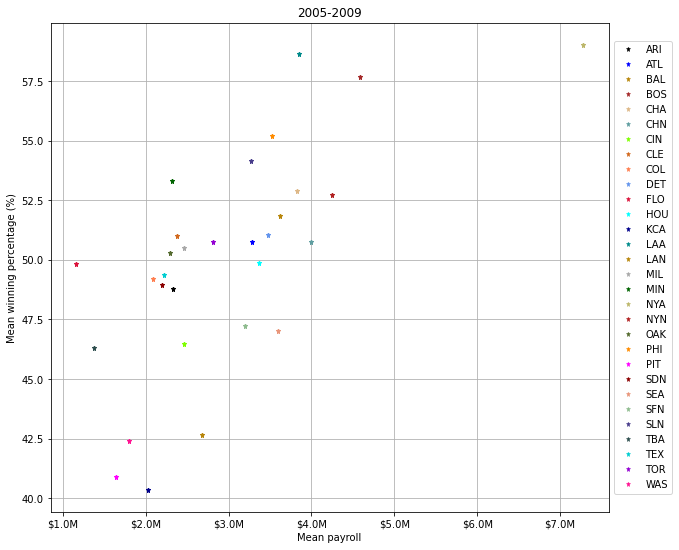

In [108]:
# plot 2005-2009 period

fig6, ax6 = plt.subplots()
ax6.set_prop_cycle(color = cnames)

for i,g in tmp.groupby('teamID'):
    ax6.plot(g['sal_mean'],g['win_per_mean'],linestyle = 'none',marker = '*',markersize =5,markeredgewidth=.5,label = i)   
    
ax6.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax6.set_xlabel('Mean payroll')
ax6.set_ylabel('Mean winning percentage (%)')
ax6.set_title('2005-2009')
ax6.grid()
ax6.xaxis.set_major_formatter(millions)
fig6.set_figwidth(10)
fig6.set_figheight(9)

In [109]:
tmp = g5.copy()
for i,g in g5.groupby('teamID'):
    for j,row in g5.iterrows():
        if row['teamID']== i:
            tmp.loc[j,'win_per_mean']=(g['winning_percentage'].sum()/5)
            tmp.loc[j,'sal_mean']=(g['payroll_mean'].sum()/5)

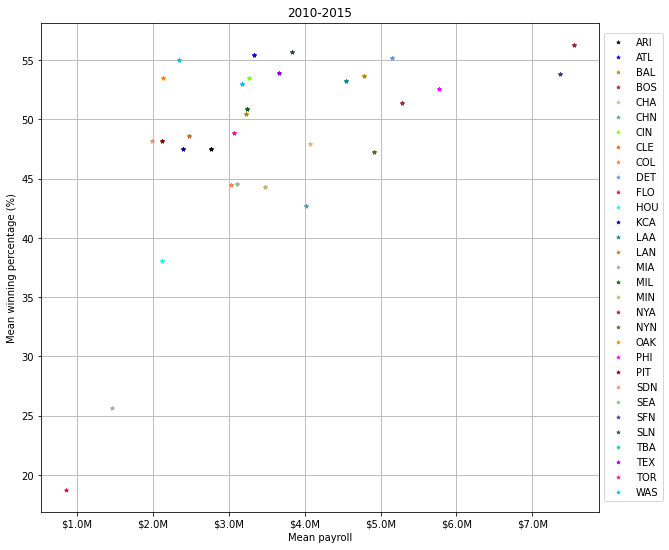

In [110]:
# plot 2010-2015 period

fig7, ax7 = plt.subplots()
ax7.set_prop_cycle(color = cnames)

for i,g in tmp.groupby('teamID'):
    ax7.plot(g['sal_mean'],g['win_per_mean'],linestyle = 'none',marker = '*',markersize =4,markeredgewidth=.5,label = i)
       
ax7.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax7.set_xlabel('Mean payroll')
ax7.set_ylabel('Mean winning percentage (%)')
ax7.set_title('2010-2015')
ax7.grid()
ax7.xaxis.set_major_formatter(millions)
fig7.set_figwidth(10)
fig7.set_figheight(9)

According to the five scatter plots above the spread of mean payroll increases across time. For instance in the 1990-1994 period the mean payroll was roughly between  0.6 - 1.2 million for all teams. 
* There is more spread in the 1995-1999 period and teams that spent 1 - 1.8 million seem to have a winning percentage around 50% and teams that spent more than 1.8 million,NYA and ATL, had winning percentage greater than 60%.Teams that spent less than 0.8 million had won less than 30%.OAK spent about 0.8 million and had a winning % less than 50%.
* In the 2000-2004 period there is even  more spread of payrolls. NYA outspent all other teams,>4.5 million, and had a winning % >60.But OAK spent about 1.5 million and had almost the same winning % as NYA.
* In the 2005-2009 period NYA continued the trend of outspending all other teams, >7 million compared to OAK's ~ 2.5 million, and had a winning percentage >57%, OAK about 50%. 
* Same for the 2010-2015 period, NYA spent the most,>7 million, but OAK had almost the same winning percentage,about 55%, while spending only about 2 million.I would say OAK were more efficient spenders.   

# Part 3: Data transformations

We'll then a new variable in the dataset that standardizes payroll conditioned on year. So, this column for team `i` in year `j` should equal:

$ standardized\_payroll_{ij} = \frac{{payroll}_{ij} - \overline{payroll}_{j} }{{s}_{j}} $

for team `i` in year `j`. 
where <!--<em><span style="text-decoration: overline">payroll</span><sub>j</sub></em>--> <em>avg\_payroll<sub>j</sub></em> is the average payroll for year `j`, and <em>s<sub>j</sub></em> is the standard deviation of payroll for year `j`.


In [ ]:
# calculate the standard deviation of payroll for each year
for i,g in dff.groupby('yearID'):# group by year
    for j,row in dff.iterrows():# iterate through df
        if row['yearID']== i: # calculate and insert std for year
            dff.loc[j,'std'] = g['payroll_mean'].std()


In [ ]:
# Calculate the stadardized payroll and add it to new column std_payroll
dff['std_payroll'] = (dff['payroll_mean'] - dff['mean_salary(/yr)'])/ dff['std']

We will repeat the same steps as step 4, but instead of average mean payroll for 5 years we will calculate the average standardized payroll for the period and plot it aganist the mean winning percentage for each period.

In [122]:
bn = [1989,1994,1999,2004,2009,2015]
l = ['1990-1994','1995-1999','2000-2004','2005-2009','2010-2015']

dff['periods'] = pd.cut(dff['yearID'],bn,labels=l)
gr = dff.groupby('periods')

g1 = gr.get_group('1990-1994')
g2 = gr.get_group('1995-1999')
g3 = gr.get_group('2000-2004')
g4 = gr.get_group('2005-2009')
g5 = gr.get_group('2010-2015')

In [135]:
tmp = g1.copy() # create a temp df for plotting
for i,g in g1.groupby('teamID'):# group by teamID to calculate each teams 5 yr avg
    for j,row in g1.iterrows():
        if row['teamID']== i:
            tmp.loc[j,'win_per_mean']=(g['winning_percentage'].sum()/5)# 5 yr win % avg
            tmp.loc[j,'std_payroll_avg']=(g['std_payroll'].sum()/5)# 5 yr std payroll avg     

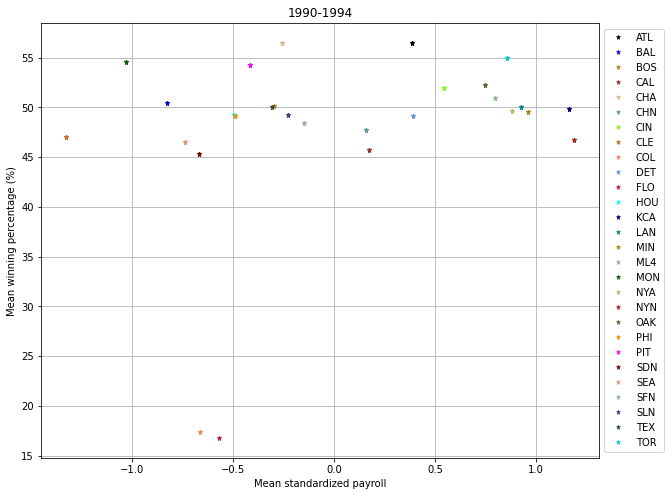

In [136]:
# plot period 1990-1994
fig8, ax8 = plt.subplots()
ax8.set_prop_cycle(color = cnames)


for i,g in tmp.groupby('teamID'):
    ax8.plot(g['std_payroll_avg'],g['win_per_mean'],linestyle = 'none',marker = '*',markersize =5,markeredgewidth=.5,label = i)   
    
ax8.legend(loc='center left', bbox_to_anchor=(1, 0.5))# place legend outside plot for clarity
ax8.set_xlabel('Mean standardized payroll')
ax8.set_ylabel('Mean winning percentage (%)')
ax8.set_title('1990-1994')
ax8.grid()
fig8.set_figwidth(10)
fig8.set_figheight(8)

In [137]:
tmp = g2.copy()
for i,g in g2.groupby('teamID'):
    for j,row in g2.iterrows():
        if row['teamID']== i:
            tmp.loc[j,'win_per_mean']=(g['winning_percentage'].sum()/5)
            tmp.loc[j,'std_payroll_avg']=(g['std_payroll'].sum()/5)

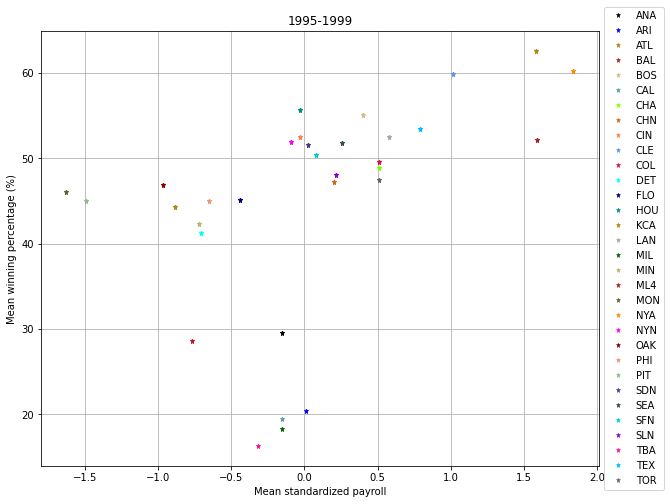

In [138]:
# plot period 1995-1999
fig9, ax9 = plt.subplots()
ax9.set_prop_cycle(color = cnames)


for i,g in tmp.groupby('teamID'):
    ax9.plot(g['std_payroll_avg'],g['win_per_mean'],linestyle = 'none',marker = '*',markersize =5,markeredgewidth=.5,label = i)   
    
ax9.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax9.set_xlabel('Mean standardized payroll')
ax9.set_ylabel('Mean winning percentage (%)')
ax9.set_title('1995-1999')
ax9.grid()
fig9.set_figwidth(10)
fig9.set_figheight(8)

In [139]:
tmp = g3.copy()
for i,g in g3.groupby('teamID'):
    for j,row in g3.iterrows():
        if row['teamID']== i:
            tmp.loc[j,'win_per_mean']=(g['winning_percentage'].sum()/5)
            tmp.loc[j,'std_payroll_avg']=(g['std_payroll'].sum()/5)


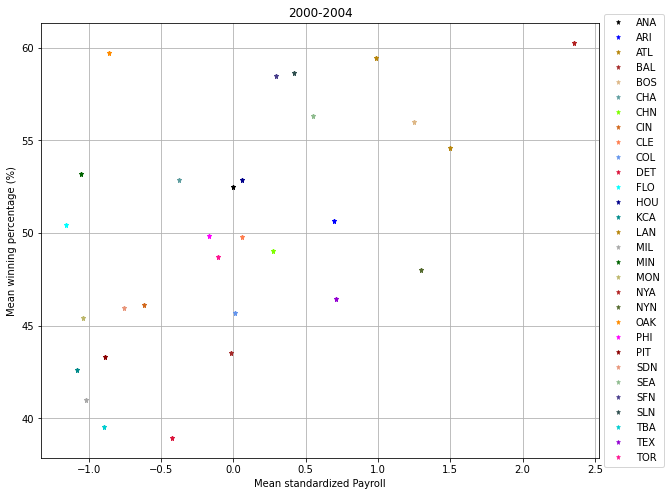

In [140]:
# plot period 2000-2004

fig10, ax10 = plt.subplots()
ax10.set_prop_cycle(color = cnames)


for i,g in tmp.groupby('teamID'):
    ax10.plot(g['std_payroll_avg'],g['win_per_mean'],linestyle = 'none',marker = '*',markersize =5,markeredgewidth=.5,label = i)   
    
ax10.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax10.set_xlabel('Mean standardized Payroll')
ax10.set_ylabel('Mean winning percentage (%)')
ax10.set_title('2000-2004')
ax10.grid()
fig10.set_figwidth(10)
fig10.set_figheight(8)

In [141]:
tmp = g4.copy()
for i,g in g4.groupby('teamID'):
    for j,row in g4.iterrows():
        if row['teamID']== i:
            tmp.loc[j,'win_per_mean']=(g['winning_percentage'].sum()/5)
            tmp.loc[j,'std_payroll_avg']=(g['std_payroll'].sum()/5)

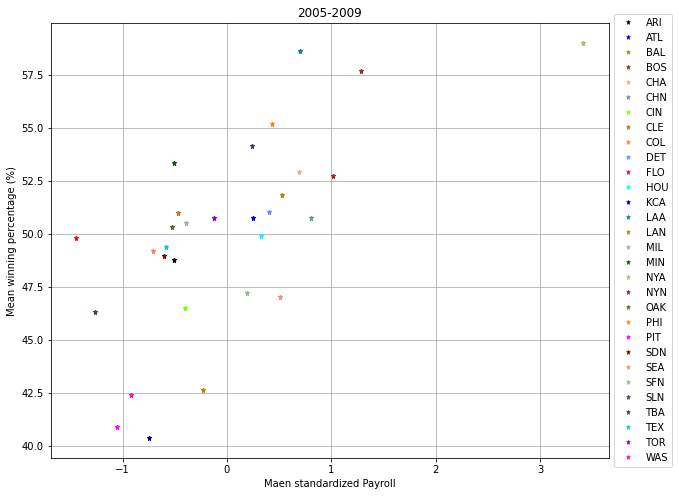

In [142]:
# plot period 2005-2009
fig11, ax11 = plt.subplots()
ax11.set_prop_cycle(color = cnames)


for i,g in tmp.groupby('teamID'):
    ax11.plot(g['std_payroll_avg'],g['win_per_mean'],linestyle = 'none',marker = '*',markersize =5,markeredgewidth=.5,label = i)   
    
ax11.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax11.set_xlabel('Maen standardized Payroll')
ax11.set_ylabel('Mean winning percentage (%)')
ax11.set_title('2005-2009')
ax11.grid()
fig11.set_figwidth(10)
fig11.set_figheight(8)

In [143]:
tmp = g5.copy()
for i,g in g5.groupby('teamID'):
    for j,row in g5.iterrows():
        if row['teamID']== i:
            tmp.loc[j,'win_per_mean']=(g['winning_percentage'].sum()/5)
            tmp.loc[j,'std_payroll_avg']=(g['std_payroll'].sum()/5)

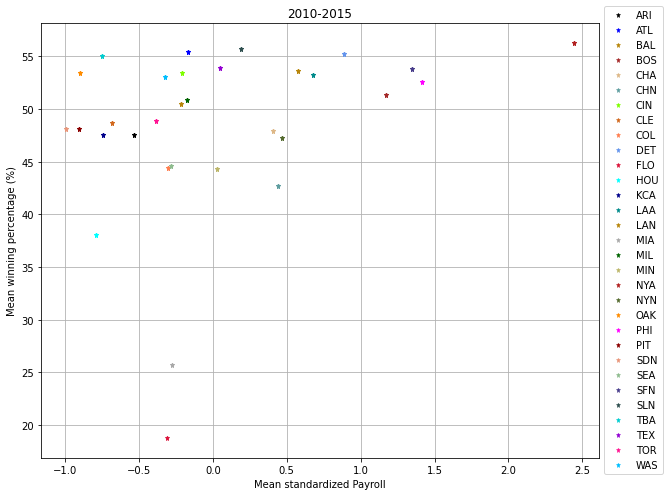

In [144]:
# plot period 2010-2015
fig11, ax11 = plt.subplots()
ax11.set_prop_cycle(color = cnames)


for i,g in tmp.groupby('teamID'):
    ax11.plot(g['std_payroll_avg'],g['win_per_mean'],linestyle = 'none',marker = '*',markersize =5,markeredgewidth=.5,label = i)   
    
ax11.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax11.set_xlabel('Mean standardized Payroll')
ax11.set_ylabel('Mean winning percentage (%)')
ax11.set_title('2010-2015')
ax11.grid()
fig11.set_figwidth(10)
fig11.set_figheight(8)

It was difficult to compare teams payroll across periods above because each team had different mean payroll and thus different standard deviation. 
But since we have calculated the standard deviation for each year and standaradized the the payroll for each team for each year comparison is easier now and it makes more sense. 
Now if the standaradized payroll is 0 for a team we can say the team spent about average compared to other teams. 
* For instance we can now easily tell NYA is outspending all other teams, about 2 standard deviations in the 1995-1999 period,~2.5 std in 2000-2004 and greater than 3 standard deviations in the 2005-2009 period.   
* We can also see that OAK spent about -1 standard deviations in payroll and had the same winning percentage as NYA,~ 60%. 

We will now plot winning percentage vs standaradized payroll for all teams across time.

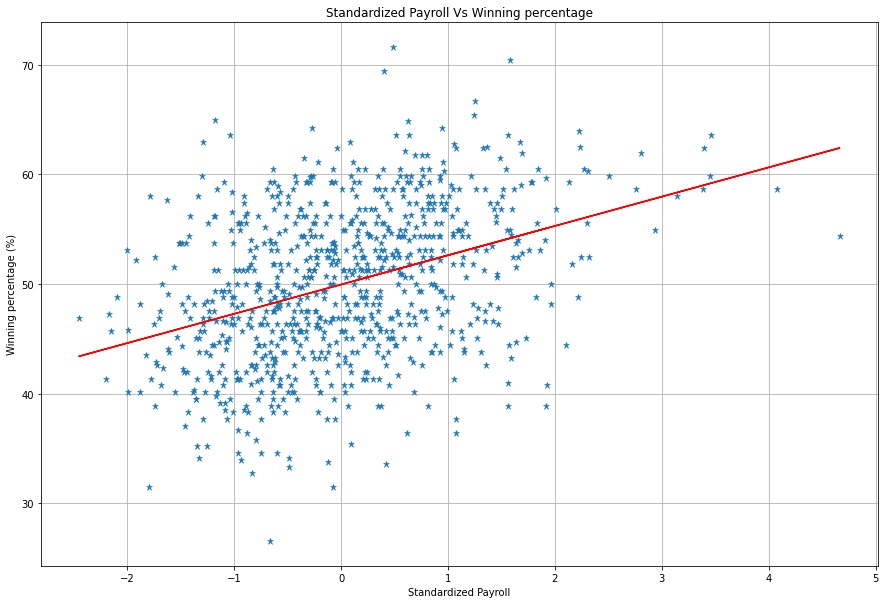

In [146]:
fig12, ax12 = plt.subplots()

m,b = np.polyfit(dff['std_payroll'],dff['winning_percentage'],1) # calculate slope and intercept for the regression line

ax12.plot(dff['std_payroll'],dff['winning_percentage'],linestyle = 'none',marker = '*',markersize =7,markeredgewidth=.5) # scatter plot
ax12.plot(dff['std_payroll'],m*(dff['std_payroll'])+b,color ='r') # add a regression line
    
ax12.set_xlabel('Standardized Payroll')
ax12.set_ylabel('Winning percentage (%)')
ax12.set_title('Standardized Payroll Vs Winning percentage')
ax12.grid()
fig12.set_figwidth(15)
fig12.set_figheight(10)

We will now calculate expected winning percentage and spending efficiency based on it, then plot efficiency across time for teams Oakland, the New York Yankees, Boston, Atlanta and Tampa Bay.

In [147]:
# calculate expected win percentage
dff['expected_win_pct'] = (50 + 2.5*dff['std_payroll'])

In [148]:
# calculate spending efficiency
dff['efficiency'] = dff['winning_percentage'] - dff['expected_win_pct']

In [149]:
# select each team from the main dataframe
atl = dff.loc[dff['teamID'] == 'ATL'] 
bos = dff.loc[dff['teamID'] == 'BOS'] 
nya = dff.loc[dff['teamID'] == 'NYA'] 
oak = dff.loc[dff['teamID'] == 'OAK'] 
tba = dff.loc[dff['teamID'] == 'TBA'] 



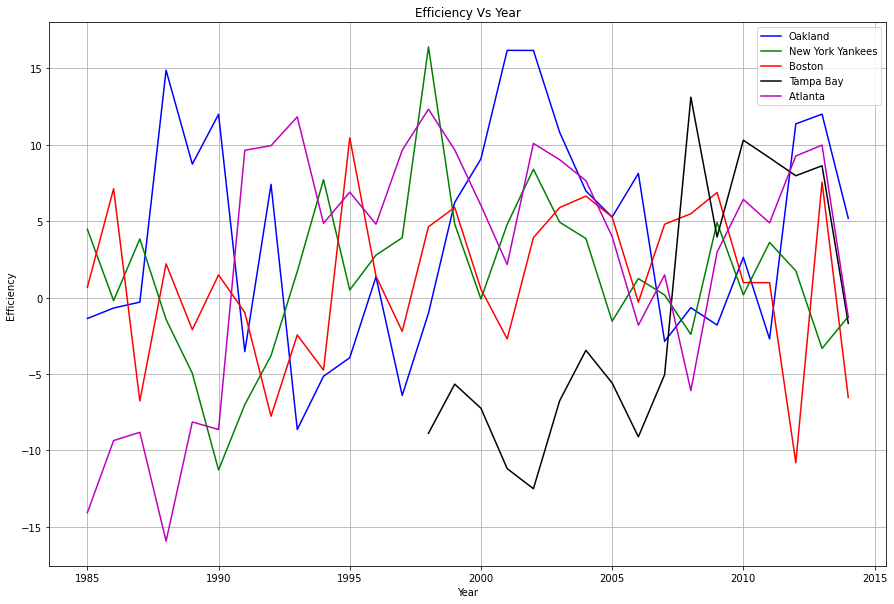

In [151]:
fig13, ax13 = plt.subplots()
ax13.plot(oak['yearID'],oak['efficiency'],ls = '-',color= 'b',label='Oakland')
ax13.plot(nya['yearID'],nya['efficiency'],ls = '-',color = 'g',label='New York Yankees')
ax13.plot(bos['yearID'],bos['efficiency'],ls = '-',color='r',label='Boston')
ax13.plot(tba['yearID'],tba['efficiency'],ls = '-',color='k',label='Tampa Bay')
ax13.plot(atl['yearID'],atl['efficiency'],ls = '-',color='m',label='Atlanta ')
ax13.set_xlabel('Year')
ax13.set_ylabel('Efficiency ')
ax13.set_title('Efficiency Vs Year')
ax13.grid()
ax13.legend()
fig13.set_figwidth(15)
fig13.set_figheight(10)





Few things we can learn from the above plot
* We can see that Oaklands efficiency went down in the early 1990s and Atlanta was the most efficient. 
* Although the New York Yankees were outspending all other teams they were the most efficient only briefly in the late 1990s. 
* Oaklands efficiency peaked in the ealy 2000s but they were still the most efficient till about 2007 when Tampa Bay were the most efficient team. It seems like other teams,Boston and Tampa Bay, had learened from the Oaklands and they were applying their technique more efficiently than them.
* In the early 2010s the New York Yankees were less efficient than Tampa Bay and Atlanta eventhough they were spending the most.
* Oaklands were the most efficient again but they were followed closely by Atlanta,Tampa Bay and Boston. Heading towards 2015 efficiency seems to go down generally, except for the New York Yankees. 
* Compared to the plots from problems 2 and 3, we can now easily see which team was the most efficient. If we only looked at the plots from problem 2 we might think that NYA was efficient because they had the highest winning percentage but they were also spending way more,more than 3 standard deviations at times. I would say the first set of plots,problem 4, were more misleading. By standardizing the payroll,problem 6, we can tell the teams effieciency more accurately and we can even calculate efficiency based on the standaradized payroll. Based on everything we have done above I think Moneyball worked for the Oakland A's and it was worthy of a movie.



Finally, to create sqlite database of the latest baseball database we will go to Chadwick Baseball Bureau's github page where they host the updated csv version of the database and download the zip file containing all tables. Since we only need the Salaries and Teams tables we will unzip the file in our working directory and use the csv_to_sqlite script, which is publically available. Then convert the two csv tables into sqlite database which we will name lahman2020.sqlite . We can add as many csv tables as we want but we will only need Salaries and Teams per instructions of this assignment.To do this we don't need to create accounts or authentication.

In [152]:
from io import BytesIO # This class is like StringIO for bytes objects
from urllib.request import urlopen # This module defines functions and classes which help in opening URLs
from zipfile import ZipFile # This module provides tools to create, read, write, append, and list a ZIP file. 
zipurl = 'https://github.com/chadwickbureau/baseballdatabank/archive/master.zip'

with urlopen(zipurl) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
        zfile.extractall()


In [153]:
import csv_to_sqlite # a script that takes CSV files as input and copies their contents into a SQLite database

# csv conversion options
options = csv_to_sqlite.CsvOptions(typing_style="full", encoding="windows-1250") 
input_files = ["baseballdatabank-master/core/Salaries.csv","baseballdatabank-master/core/Teams.csv"] # pass in a list of CSV files
csv_to_sqlite.write_csv(input_files, "lahman2020.sqlite", options)

Written 29383 rows into 2 tables in 0.455 seconds


29383

Let's check if everything works


In [154]:
sq_f = 'lahman2020.sqlite'
cn = sqlite3.connect(sq_f)

In [155]:
# team query
tm_q = "SELECT yearID,teamID,lgID,name,franchID,G as Games,W as Wins,L as Losses,Rank, (W*100.0/G) as winning_percentage FROM Teams WHERE  yearID >= '1985' GROUP BY yearID,teamID"
# convert to pandas dataframe
tm_df = pd.read_sql(tm_q,cn)

In [157]:
tm_df.tail(5)

,yearID,teamID,lgID,name,franchID,Games,Wins,Losses,Rank,winning_percentage
1033,2020,SLN,NL,St. Louis Cardinals,STL,58,30,28,3,51.724138
1034,2020,TBA,AL,Tampa Bay Rays,TBD,60,40,20,1,66.666667
1035,2020,TEX,AL,Texas Rangers,TEX,60,22,38,5,36.666667
1036,2020,TOR,AL,Toronto Blue Jays,TOR,60,32,28,3,53.333333
1037,2020,WAS,NL,Washington Nationals,WSN,60,26,34,4,43.333333


Sadly the latest Salaries data I can find was upto 2016,everything else is up to date on the github page I mentioned. I'm convinced it's not avalable anywhere, because I searched for it thoroughly.However, I can be very wrong, but the method used to extract the data and convert it to sqlite database can be used with a different link.
The Chadwick Baseball Bureau's github page is being constantly updated,the latest update was 17 hours ago,as of July 06,2021, I hope they'll add 2020's data to the Salaries table soon.
  